In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import torch
import torchvision
tf = torchvision.transforms.ToTensor()
from pathlib import Path
from tqdm import tqdm
import PIL
import yaml
from omegaconf import OmegaConf

from rqvae.models.rqvae.rqvae import RQVAE
from rqvae.utils.config import load_config, augment_arch_defaults
from rqvae.models import create_model


In [5]:
model_path = Path("/home/jongmin/userdata/rq-vae-transformer-latent-score/logs/ls-rqvae-7x7x4_unshared_1024__112_unshared/11122024_173629/epoch1370_model.pt")

config_path = Path("/home/jongmin/userdata/rq-vae-transformer-latent-score/logs/ls-rqvae-7x7x4_unshared_1024__112_unshared/11122024_173629/config.yaml")
config = OmegaConf.load(config_path)


In [9]:
config = load_config(config_path)
config.arch = augment_arch_defaults(config.arch)

In [13]:
model, _ = create_model(config.arch)
model.load_state_dict(torch.load(model_path)["state_dict"])
model.eval()
model.cuda()


Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


RQVAE(
  (encoder): Encoder(
    (conv_in): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0-1): 2 x Module(
        (block): ModuleList(
          (0-1): 2 x ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=True)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
      (2): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2

In [12]:
model

RQVAE(
  (encoder): Encoder(
    (conv_in): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0-1): 2 x Module(
        (block): ModuleList(
          (0-1): 2 x ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=True)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
      (2): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2

In [17]:
image = PIL.Image.open("/home/jongmin/userdata/ocr-vqgan-latent-score/Olimpic_grandstaff_128_gray/beethoven_piano-sonatas_sonata01-1_original_m-0-5.jpg")

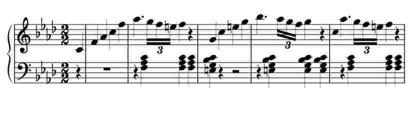

In [18]:
image.show()

In [19]:
image = tf(image)
image.shape

torch.Size([1, 128, 419])

In [21]:
out = model.get_codes(image.unsqueeze(0).cuda())
out.shape


torch.Size([1, 8, 26, 4])

In [22]:
out

tensor([[[[ 189,  494,  537,   79],
          [ 966,  276,   73,  306],
          [ 628,  745,  582,  917],
          [ 701,  666,  668,  968],
          [ 151, 1017,  559,  503],
          [ 575,  591,  329,  201],
          [ 988,  633,  685,   36],
          [ 658,  456,  740,  141],
          [ 453,  366,   80,  647],
          [ 940,  279,  722,  858],
          [ 701,  156,  870,  469],
          [ 628,  253,  399,  297],
          [ 701,  754,  868,  692],
          [ 708,  490,  820,  302],
          [ 250,  456,  744,  742],
          [ 628,   43,  817,  734],
          [ 484,  647,   73,  164],
          [ 838,  753,  848,  720],
          [ 658,  253,  510,  558],
          [ 388,  360,  817,  627],
          [ 350,  347,  619,   72],
          [ 453,  271,  628,  152],
          [ 999,  229,  232,  254],
          [ 628,  253,  615,  443],
          [ 250,  754,  806,  710],
          [ 708,  366,  154,  962]],

         [[ 843,  826,  717,  171],
          [ 861,  542,  70